<a href="https://colab.research.google.com/github/wesleyiuri/UFRN/blob/main/Agrupamento%20de%20Texto%20-%20Dataset%2020NewsGroups/Agrupamento_Texto_Dataset_20NewsGroups.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE**

**DEPARTAMENTO DE ENGENHARIA ELÉTRICA**

**GRADUAÇÃO EM ENGENHARIA ELÉTRICA**

**Disciplina:** Tópicos Especiais em Inteligência Artificial - ELE0606

**Discente:** Wesley Iuri Dantas dos Santos

**Docente:** Jose Alfredo Ferreira Costa

# **1. Introdução**



**1.1. Algoritmo K-means:** é um algoritmo de agrupamento não supervisionado usado para dividir um conjunto de dados em grupos (clusters) com base na similaridade dos atributos. Ele tenta encontrar k centros de cluster que minimizem a soma dos quadrados das distâncias entre os pontos de dados e os centros do cluster.

**1.2. Objetivo da atividade:** O objetivo principal é realizar um agrupamento utilizando o algoritmo K-means, com o intuito de gerar uma visualização dos dados. Além disso, pretende-se empregar a técnica do SOM (Self-Organizing Map) para visualizar os agrupamentos em um mapa.

O projeto é aplicado na base de dados 20newsgroup que está disponível nos conjuntos de dados Scikit-learn.

**1.3. Fonte:** Essa atividade segue o modelo disponível no site: https://machinelearninggeek.com/text-clustering-clustering-news-articles/

# **2. Definições inicias**



**2.1. Importar bibliotecas**

In [ ]:
!pip uninstall sompy
#!pip install --upgrade sompy

!pip install git+https://github.com/sevamoo/SOMPY.git

  Cloning https://github.com/sevamoo/SOMPY.git to /tmp/pip-req-build-cqdxnggm
  Running command git clone --filter=blob:none --quiet https://github.com/sevamoo/SOMPY.git /tmp/pip-req-build-cqdxnggm
  Resolved https://github.com/sevamoo/SOMPY.git to commit 6aca604b06e5eea1391ecf507810c7aabafc3f8b
  Preparing metadata (setup.py) ... done
  Created wheel for SOMPY: filename=SOMPY-1.1.1-py3-none-any.whl size=29184 sha256=ca95d50382f71ea647863c0fab1c955a40e21ea3fb2cbf8f7e5e23635b1ed5d5
  Stored in directory: /tmp/pip-ephem-wheel-cache-jykc71wa/wheels/88/5c/6c/4f6b658484ba3ae52ed93a9ffa0e4d54cbfb3f4e2624b6fdc0
Successfully built SOMPY


In [ ]:
# Panda é uma biblioteca para analise de dados
import pandas as pd

# NumPy é uma biblioteca em Python utilizada para computação científica e análise de dados#
import numpy as np

# Matplotlib biblioteca para visualização de dados
# Pyplot é um módulo da biblioteca Matplotlib que fornece uma interface simples para criar gráficos em Python
import matplotlib.pyplot as plt

# Verificar desempenho do clustering
from sklearn import metrics

# Base de dados 20newsgroups
from sklearn.datasets import fetch_20newsgroups

# Importar o modelo k-means
from sklearn.cluster import KMeans

# Vetorização TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Pré-processamento de texto usando Tokenizer
from nltk.tokenize import RegexpTokenizer

# Importar WordCloud
from wordcloud import WordCloud

# Importar STOPWORDS
from wordcloud import STOPWORDS

# from sompy import SOM
#from sompy.sompy import SOM

**2.2. Configuração de exibição do dataframe**

In [ ]:
# Configurar a exibição do DataFrame completo
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# **3. Base de dados**

**3.1. Importar base de dados**

In [ ]:
# Filtrar quais categorias dos 20 grupos vai ser usada no algoritmo
grupos = ['soc.religion.christian',
              'comp.graphics']

# Carregar a base de dados para treino e teste
# O parâmetro subset é usado para especificar se deseja-se carregar a parte de treinamento ou teste
# O parâmetro categories especifica as categorias de tópicos que desejamos carregar
# O parâmetro shuffle indica se os dados devem ser embaralhados aleatoriamente
# O parâmetro random_state define uma semente para a aleatoriedade, garantindo que os resultados sejam reproduzíveis
Base_Dados_Train = fetch_20newsgroups(subset='train', categories=grupos, shuffle=True, random_state=42)
Base_Dados_Test = fetch_20newsgroups(subset='test', categories=grupos, shuffle=True, random_state=42)

# Criar um dataframe para visualizar os dados e target
Base_Dados_Train_DF = pd.DataFrame({'Text': Base_Dados_Train.data, 'Target': Base_Dados_Train.target, 'Target Names': [Base_Dados_Train.target_names[target] for target in Base_Dados_Train.target]})

# Imprimir o número de registros nos conjuntos de treinamento e teste
len(Base_Dados_Train.data),len(Base_Dados_Test.data)

(1183, 787)

In [ ]:
# Exibir as categorias
#print(Base_Dados_Train_DF.drop('Text', axis=1).head(10))

print(Base_Dados_Train_DF.head(2))

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                Text  \
0                                                                                                                                                               

**3.2. Pré-processamento e Vetorização**

**Pré-processamento Tokenizer:**

O tokenizador é usado em conjunto com o vetorizador TF-IDF para pré-processar o texto antes da vetorização.

Quando for aplicado o tokenizador no texto, ele irá separar o texto em palavras individuais, ignorando pontuações e outros caracteres não alfanuméricos.

O tokenizer é passado como um argumento para o parâmetro tokenizer do TfidfVectorizer, que o utilizará para dividir o texto em palavras durante o processo de vetorização TF-IDF.

**Vetorizador TF-IDF:**

A vetorização TF-IDF (Term Frequency-Inverse Document Frequency) é uma técnica usada para representar texto em formato numérico, mais especificamente como vetores numéricos.

A vetorização TF-IDF calcula um valor numérico para cada palavra presente em um conjunto de documentos, com base em sua frequência no documento e em toda a coleção de documentos. O objetivo é destacar as palavras que são mais importantes e discriminativas para cada documento em relação ao restante da coleção.

>**O cálculo do TF-IDF é feito em duas etapas:**

>**Frequência do termo (TF - Term Frequency):** calcula a frequência de uma palavra específica em um documento. Geralmente, é usado um esquema de contagem simples, como a frequência absoluta ou a frequência relativa.

>**Frequência inversa do documento (IDF - Inverse Document Frequency):** calcula o peso inverso de uma palavra com base em sua frequência em toda a coleção de documentos. Palavras raras que aparecem em poucos documentos terão um valor IDF maior, enquanto palavras comuns que aparecem em muitos documentos terão um valor IDF menor.

>A combinação do TF e IDF resulta em um valor TF-IDF para cada palavra em cada documento. Esse valor representa a importância relativa de uma palavra em um documento específico em relação ao conjunto de documentos. Os valores TF-IDF mais altos indicam palavras mais importantes e distintivas para um documento.

In [ ]:
# Cria um objeto tokenizer para pré-processamento do texto, dividindo um texto em unidades menores, chamados de tokens
# A expressão regular r'\w+' corresponde a qualquer sequência de caracteres alfanuméricos (letras ou números)
token = RegexpTokenizer(r'\w+')

# Criar um objeto TF-IDF para vetorização do texto
# lowercase=True: converte o texto em minúsculas durante a vetorização
# stop_words='english: remove as palavras comuns em inglês, como "a", "an", "the", etc
# ngram_range=(1, 1): gera recursos considerando apenas palavras individuais
# tokenizer=token.tokenize: define o tokenizador a ser usado, baseado na expressão regular definida anteriormente
# token_pattern=None: informa que o padrão dob'token_pattern' não será aplicado porque estou fornecendo o token na linha anterior
Vetor_TF_IDF = TfidfVectorizer(lowercase=True,
                        stop_words='english',
                        ngram_range = (1,1),
                        tokenizer = token.tokenize,
                        token_pattern=None)

# Usar fit_transform para ajusta o vetorizador aos dados de treinamento e, em seguida, transforma os dados de treinamento em sua representação vetorizada
# O vetorizador vai analisar o conjunto de dados de treinamento para aprender o vocabulário e calcular as estatísticas necessárias para a vetorização TF-IDF
# Depois vai converter o texto em uma representação numérica usando a vetorização TF-IDF
X_train_vetor = Vetor_TF_IDF.fit_transform(Base_Dados_Train.data)

# Verificar o Shape do novo vetor
X_train_vetor.shape

(1183, 22690)

# **4. Modelo K-means**

**4.1. Criar o modelo**

In [ ]:
# Realizar o agrupamento dos dados em dois clusters usando o algoritmo K-means
# Depois atribuir as etiquetas de clusters previstas pelo algoritmo K-means para os dados de treinamento

# Criar o objeto k-means e treinar os dados de treino
# n_clusters=2: Pois conhecemos a base de dados, no qual usamos duas categorias diferentes
# n_init=10: indica que algoritmo K-means será executado 10 vezes com diferentes centroides iniciais
# fit(): O modelo está sendo treinado para aprender a estrutura dos dados e identificar os clusters
kmeans = KMeans(n_clusters=2, n_init=10).fit(X_train_vetor)

# Cada amostra nos dados de treinamento é atribuída a um cluster com base nas características e na posição relativa aos centróides do K-means
pred_labels = kmeans.labels_
len(pred_labels)

1183

**4.2. Avaliar desempenho do clustering**

**DBI Score:** O índice Davies-Bouldin (DBI) é uma medida que quantifica a separação entre os clusters e a similaridade dentro de cada cluster. Quanto menor o valor do DBI, melhor a separação entre os clusters.

**Silhouette Score:** O coeficiente de silhueta (Silhouette Score) mede a qualidade dos clusters, considerando a distância média intra-cluster e a distância média inter-cluster. O valor do coeficiente de silhueta varia entre -1 e 1, onde valores mais próximos de 1 indicam uma separação adequada entre os clusters.

In [ ]:
# DBI score
dbi = metrics.davies_bouldin_score(X_train_vetor.toarray(), pred_labels)

# Silhoutte Score
ss = metrics.silhouette_score(X_train_vetor.toarray(), pred_labels , metric='euclidean')

# Mostrar o resultado
print("DBI Score: ", dbi, "\nSilhoutte Score: ", ss)

DBI Score:  9.96967206976409 
Silhoutte Score:  0.00843969833869843


# **5. Visualização**

**5.1. WordCloud - Nuvens de palavras para cada agrupamento**

In [ ]:
def word_cloud(text,wc_title,wc_file_name='wordcloud.jpeg'):
    # Create stopword list
    stopword_list = set(STOPWORDS)

    # Create WordCloud
    word_cloud = WordCloud(width = 800, height = 500,
                           background_color ='white',
                           stopwords = stopword_list,
                           min_font_size = 14).generate(text)

    # Set wordcloud figure size
    plt.figure(figsize = (8, 6))

    # Set title for word cloud
    plt.title(wc_title)

    # Show image
    plt.imshow(word_cloud)

    # Remove Axis
    plt.axis("off")

    # save word cloud
    plt.savefig(wc_file_name,bbox_inches='tight')

    # show plot
    plt.show()

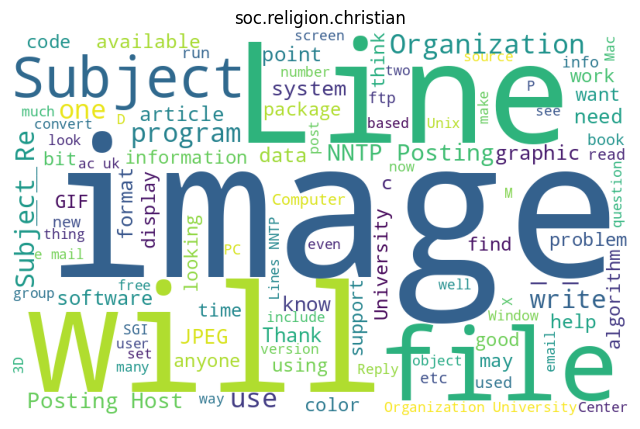

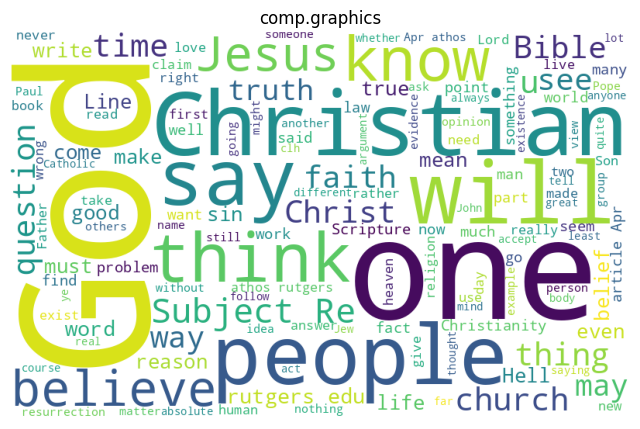

In [ ]:
# Criar o DataFrame com base nas arrays
df=pd.DataFrame({"text":Base_Dados_Train.data,"labels":pred_labels})


for i in df.labels.unique():
    new_df=df[df.labels==i]
    text="".join(new_df.text.tolist())
    word_cloud(text,Base_Dados_Train.target_names[i], Base_Dados_Train.target_names[i]+'.jpeg')

**5.2. U-Matrix**

In [ ]:
# Obter as coordenadas do espaço de características
feature_space = kmeans.transform(X_train_vetor)

# Criar a U-Matrix usando a biblioteca IntraSOM
som = SOM(data=feature_space, neighborhood='gaussian', name='sompy')
som.train(n_job=1, verbose='info')

# Calcular as distâncias de todos os neurônios para os dados de entrada
distance_map = som.calculate_map_dist()

# Visualizar a U-Matrix
plt.imshow(distance_map, cmap='viridis')
plt.colorbar()
plt.title('U-Matrix')
plt.show()

 Training...
 pca_linear_initialization took: 0.005000 seconds
 Rough training...
 radius_ini: 3.000000 , radius_final: 1.000000, trainlen: 5



AttributeError: ignored